In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/health-insurance-dataset/Health_insurance.csv


In [7]:

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)
import pandas_profiling as pp
  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
  
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('../input/health-insurance-dataset/Health_insurance.csv')

In [5]:
#Exploring the data for higher level information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [12]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
fig = px.histogram(df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [14]:
fig = px.histogram(df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

In [16]:
fig = px.histogram(df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['red', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [17]:
fig = px.histogram(df,
                   x = 'charges',
                   color = 'sex',
                   color_discrete_sequence = ["blue","red"],
                   title = 'Different charges over genders'
               
)
fig.update_layout(bargap=0.1)
fig.show()

In [18]:
fig = px.histogram(df,
                  x = "charges",
                  marginal = 'box', 
                   color="region",
                  title = "charges over different regions of U.S.A")
fig.update_layout(bargap=0.1)
fig.show()

In [19]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [20]:
px.histogram(df, x='smoker', color='sex', title='Smoker')


In [21]:
fig = px.histogram(df,
                  x = 'charges',
                   marginal ="box",
                  color = 'children',
                  title = 'charges incurred by children')
fig.update_layout(bargap=0.1)
fig.show()

In [22]:
fig = px.scatter(df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [23]:
fig = px.scatter(df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [24]:
px.violin(df,x = 'children',y = 'charges')

In [25]:
df.charges.corr(df.age)

0.2990081933306476

In [26]:
df.charges.corr(df.bmi)

0.19834096883362895

In [27]:
df.children.corr(df.charges)

0.0679982268479048

In [30]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = df.smoker.map(smoker_values)
df.charges.corr(smoker_numeric)

0.787251430498478

In [31]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

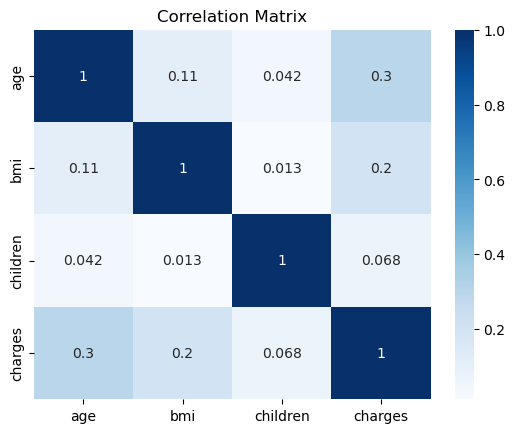

In [32]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.title('Correlation Matrix')

In [33]:
non_smoker_df = df[df.smoker == 'no']

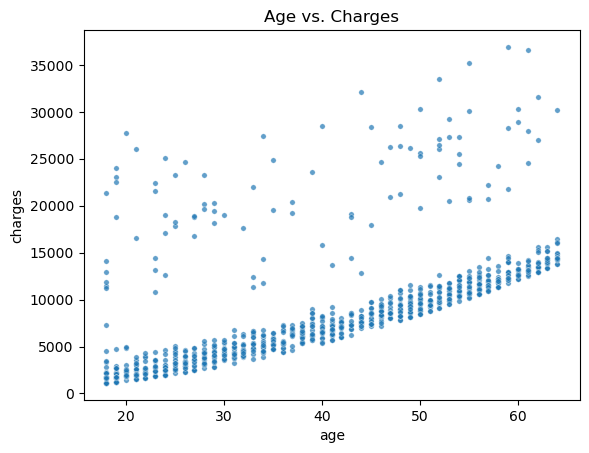

In [34]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

In [35]:
def estimate_charges(age, w, b):
    return w * age + b

In [36]:
w = 50
b = 100

In [37]:
estimate_charges(30,w,b)

1600

In [38]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [39]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

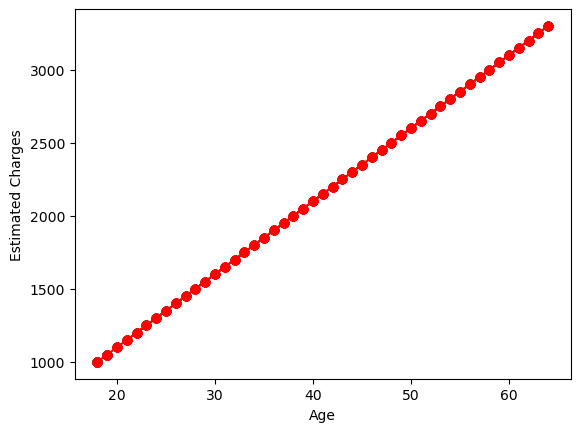

In [40]:
plt.scatter(ages, estimated_charges);
plt.plot(ages,estimated_charges,'r-o')
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

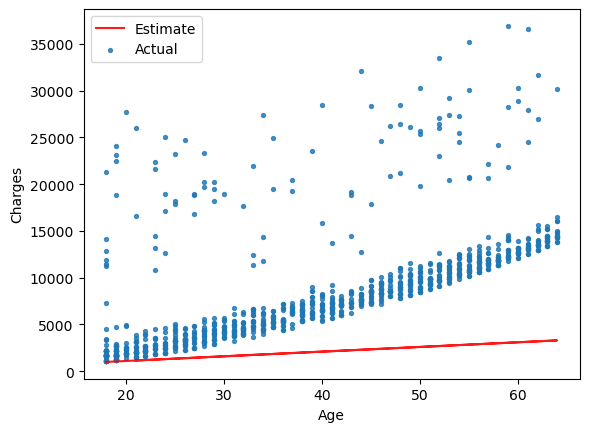

In [41]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

In [42]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

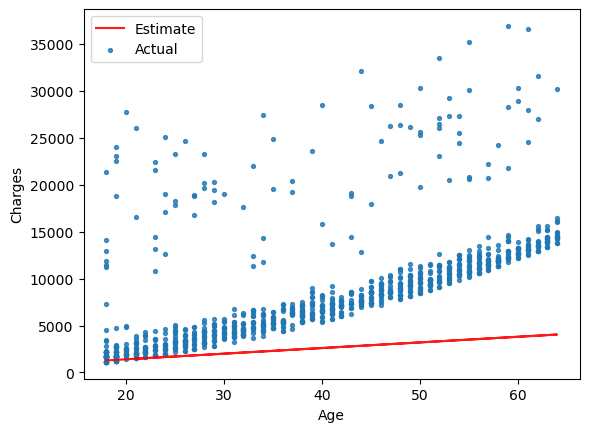

In [43]:
try_parameters(60, 200)

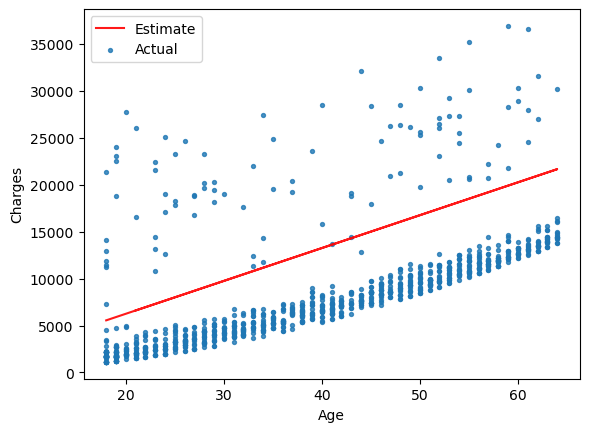

In [44]:
try_parameters(350,-750)

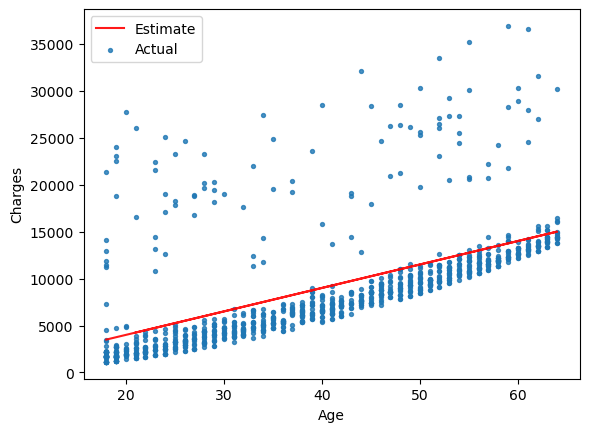

In [45]:
try_parameters(250,-1000)

In [46]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [47]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [48]:
rmse(targets, predicted)

8461.949562575493

In [49]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  4664.426039892948


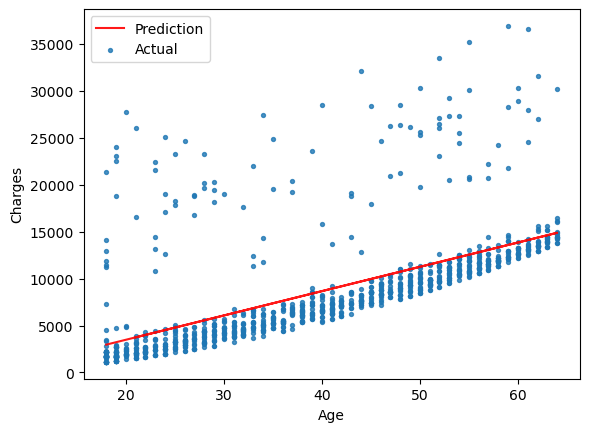

In [50]:
try_parameters(259,-1700)

Linear Regression using Scikit-learn
above methods are created by us manually but in practice we are periodically be using Scikit-learn as it contains all the necessary ML functions and libraries

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

In [53]:
model = LinearRegression()

In [54]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (1064, 1)
targes.shape : (1064,)


In [55]:
model.fit(inputs, targets)

LinearRegression()

In [56]:
predictions = model.predict(inputs)

In [57]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [58]:
rmse(targets, predictions)

4662.505766636395

In [59]:
# w
model.coef_

array([267.24891283])

In [60]:
# b
model.intercept_

-2091.4205565650864

Optionally: Use the SGDRegressor class from scikit-learn to train a model using the stochastic gradient descent technique.

In [61]:
model1 = SGDRegressor()

In [62]:
model1.fit(inputs,targets)

SGDRegressor()

In [63]:
predictions = model1.predict(inputs)
rmse(targets, predictions)

6652.033880500773

In [65]:
smoker_df = df[df.smoker == 'yes']
smoker_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [66]:
inputs = smoker_df[['age']]
targets = smoker_df.charges
print('',inputs.shape)
print('',targets.shape)

 (274, 1)
 (274,)


In [67]:
model.fit(inputs,targets)

LinearRegression()

In [68]:
predicted = model.predict(inputs)
print('RMSE:',)
rmse(targets,predicted)

RMSE:


10711.00334810241

Machine Learning
Every machine learning problem has three components:

Model

Cost Function

Optimizer

In [69]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.505766636395


Linear Regression using Multiple Features¶
So far, we've used on the "age" feature to estimate "charges". Adding another feature like "bmi" is fairly straightforward. We simply assume the following relationship:

charges=w1×age+w2×bmi+b
 
We need to change just one line of code to include the BMI.

In [70]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.3128354612945


In [71]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.0840365431283327

In [72]:
fig = px.scatter(non_smoker_df, x='bmi', y='charges', title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [73]:
fig = px.scatter_3d(non_smoker_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()